In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
#read the data into Datframe
df=pd.read_csv("D:/Sofia_courses/DataMining/loan_data.csv", delimiter=",")

In [3]:
#give the column with multiple possible features each a new column to provide the same distance of uncorrelated/unlinear features
cat_feats=['purpose']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [4]:
#show information about the values in the columns
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.  
-purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational",     "major_purchase", "small_business", and "all_other").  
-int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.   
-installment: The monthly installments owed by the borrower if the loan is funded.   
-log.annual.inc: The natural log of the self-reported annual income of the borrower.     
-dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).   
-fico: The FICO credit score of the borrower.   
-days.with.cr.line: The number of days the borrower has had a credit line.   
-revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).   
-revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).   
-inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.    
-delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.    
-pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).   

In [5]:
#display some values
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#as visible the rating of the lending club(credit policy) correlates with the value of the FICO

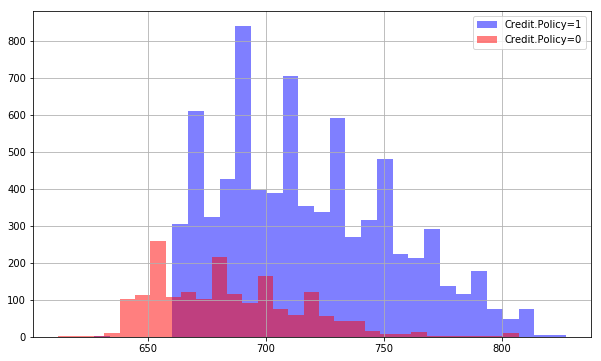

In [6]:
#show some data

plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()

as shown in this chart a costumer fullfilling the critera of the lendingclub (credit.policy=1) have a relative higher chance of paying of their loan

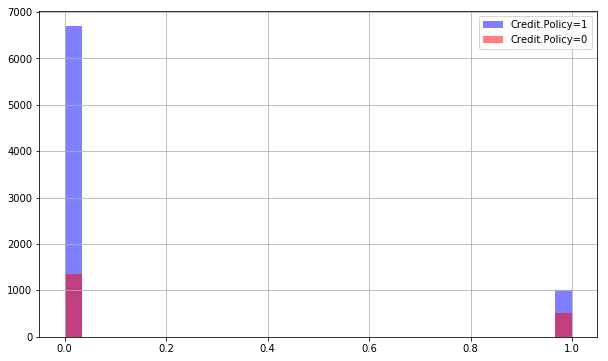

In [7]:

plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['not.fully.paid'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['not.fully.paid'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()

The problem as visible in the last charts is that unresolved loans are less common than resolved loans. This means that the data should first be sampled to prevent a model from always predicting the class that is more frequent than the other.

In [8]:
print("ralative value of the different classes")
(len(df.loc[df["credit.policy"]==0])) / (len(df.loc[df["credit.policy"] == 1])) * 100

ralative value of the different classes


24.228274967574578

In [9]:
#divide the data into training and test set

X = df.drop('credit.policy',axis=1)
Y = df['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

A first check how well a simply linear classifier would work for this task.

In [13]:
def get_scores(classifier):
    print("accuracy: ",classifier.score(X_test,y_test))
    predicts = classifier.predict(X_test)
    print("F1 score: ",f1_score(y_test, predicts))
    print("")
    print("Confusion matrix showing false/positives:")
    print(pd.DataFrame(confusion_matrix(y_test, predicts)))

    return f1_score(y_test, predicts)

In [11]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression( max_iter = 100).fit(X_train, y_train)
reg_f1 = get_scores(reg)

accuracy:  0.9025748086290883
F1 score:  0.9422442244224423

Confusion matrix showing false/positives:
     0     1
0  310   224
1   56  2284


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)
get_scores(rfc)

accuracy:  0.9940848990953375
F1 score:  0.9963744934954148

Confusion matrix showing false/positives:
     0     1
0  521    13
1    4  2336


0.9963744934954148

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier(max_depth = 12)
dtree.fit(X_train,y_train)
get_scores(dtree)

accuracy:  0.9895615866388309
F1 score:  0.9935787671232876

Confusion matrix showing false/positives:
     0     1
0  523    11
1   19  2321


0.9935787671232876

# Stacking

For stacking some base learners are defined and tested individually for their performance. In the next step they are stagged and the overall performace of the meta learner is checked.

In [36]:
def get_models():
	models = dict()
	models['logisticRegression'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

In [37]:

#get the models
models = get_models()
results, names = list(), list()

def evaluate_model(model):
    model.fit(X_train,y_train)
    return get_scores(model)

#evaluate each model 
for name, model in models.items():

	score = evaluate_model(model)
	results.append(score)
	names.append(name)
	print("score of ", name, "is  > ", score)

accuracy:  0.9025748086290883
F1 score:  0.9422442244224423

Confusion matrix showing false/positives:
     0     1
0  310   224
1   56  2284
score of  logisticRegression is  >  0.9422442244224423
accuracy:  0.8291579679888657
F1 score:  0.9013065326633166

Confusion matrix showing false/positives:
     0     1
0  141   393
1   98  2242
score of  knn is  >  0.9013065326633166
accuracy:  0.8274182324286709
F1 score:  0.9038013964313422

Confusion matrix showing false/positives:
    0     1
0  48   486
1  10  2330
score of  svm is  >  0.9038013964313422
accuracy:  0.8660403618649966
F1 score:  0.922175055589246

Confusion matrix showing false/positives:
     0     1
0  208   326
1   59  2281
score of  bayes is  >  0.922175055589246


<BarContainer object of 4 artists>

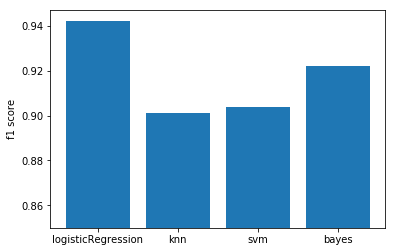

In [38]:
samller_results = [x-0.85 for x in results]
plt.ylabel("f1 score")
plt.bar(names,samller_results,bottom = 0.85)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=40, random_state=1)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=10))             
                ]

level0 = list()
level0.append(('lr', LogisticRegression(max_iter=500)))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

base_learners = level0
print(get_models())

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=500))
clf.fit(X_train, y_train)
clf_f1 = get_scores(clf)

{'logisticRegression': LogisticRegression(), 'knn': KNeighborsClassifier(), 'svm': SVC(), 'bayes': GaussianNB()}
accuracy:  0.9913013221990258
F1 score:  0.9946524064171123

Confusion matrix showing false/positives:
     0     1
0  524    10
1   15  2325


<BarContainer object of 5 artists>

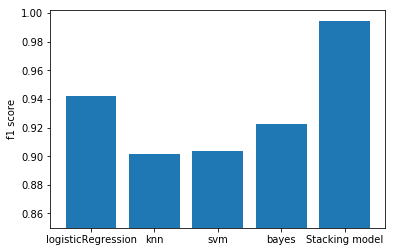

In [40]:
results.append(clf_f1)
names.append("Stacking model")
samller_results = [x-0.85 for x in results]
plt.ylabel("f1 score")
plt.bar(names,samller_results,bottom = 0.85)

The f1 score is a better evaluation score to use than accuracy in this case, because the classes are uneven and predicting with a dummy classifierer will already score a accuracy of 80%.
This chart shows the strength of a stacking model. Just using the logistic regression model has a f1 score of about 94%, whereas the stacking model, which uses logistic regression as a meta model and is trained with the data genereated by several base models has a f1 score of about 99%. 

# Bagging

For bagging the same data will be used.

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_train, y_train)
get_scores(clf)

accuracy:  0.8274182324286709
F1 score:  0.9038013964313422

Confusion matrix showing false/positives:
    0     1
0  48   486
1  10  2330


0.9038013964313422

# Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [49]:
gradient_boostclf = GradientBoostingClassifier(random_state=0)
gradient_boostclf.fit(X_train, y_train)
get_scores(gradient_boostclf)

accuracy:  0.9930410577592206
F1 score:  0.9957356076759062

Confusion matrix showing false/positives:
     0     1
0  519    15
1    5  2335


0.9957356076759062

In [46]:
ada_boostclf = AdaBoostClassifier(random_state=0)
ada_boostclf.fit(X_train, y_train)
get_scores(ada_boostclf)

accuracy:  0.9867780097425192
F1 score:  0.9918941979522183

Confusion matrix showing false/positives:
     0     1
0  511    23
1   15  2325


0.9918941979522183

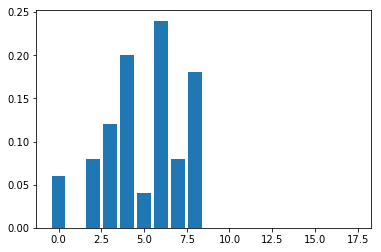

In [52]:
feature_importence = ada_boostclf.feature_importances_
plt.bar(range(len(feature_importence)), feature_importence)
plt.show()

In [15]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
get_scores(xgb_clf)

accuracy:  0.9951287404314544
F1 score:  0.9970111016225449

Confusion matrix showing false/positives:
     0     1
0  525     9
1    5  2335


0.9970111016225449

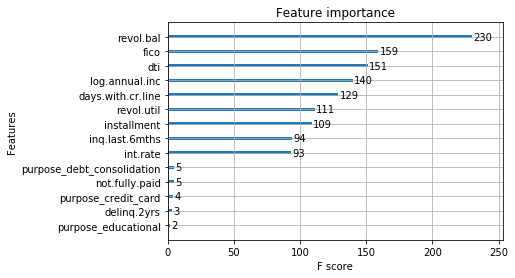

In [16]:
plot_importance(xgb_clf)
plt.show()

For the model that is performing excellent on this dataset the feature importance of this model shows, that the borrower's revolving balance is the most important feature for the decision of the credit policy. The next important features of making good predictions are the FICO credit score and the debt-to-income ratio of the borrower.  